In [1]:
import os
import json
import pandas as pd

In [2]:
# Load results from the results folder
results_folder = "./results"
results = []

for file_name in os.listdir(results_folder):
    if file_name.endswith("_results.json"):
        file_path = os.path.join(results_folder, file_name)
        with open(file_path, "r") as f:
            data = json.load(f)
            data["engine"] = file_name.replace("_results.json", "")
            results.append(data)

# Convert results to a DataFrame
df = pd.DataFrame(results)
df

,elapsed_time,mean_elapsed_time,peak_cpu,peak_logical_cpu,peak_memory,engine
0,323.271166,32.327117,24.25,7.760,3513.830078,EasyOCR
1,2233.406280,223.340628,83.95,26.864,5769.371094,MMOCR
2,12.983740,1.298374,14.85,4.752,100.302734,TesseractOCR
3,12.992700,1.299270,45.90,14.688,347.265625,PaddleOCR


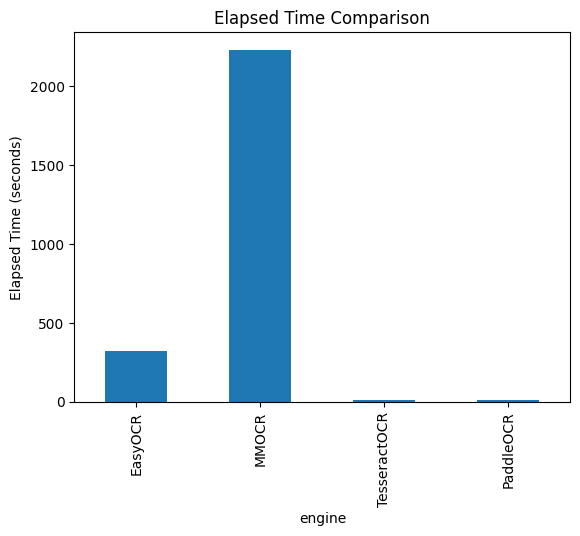

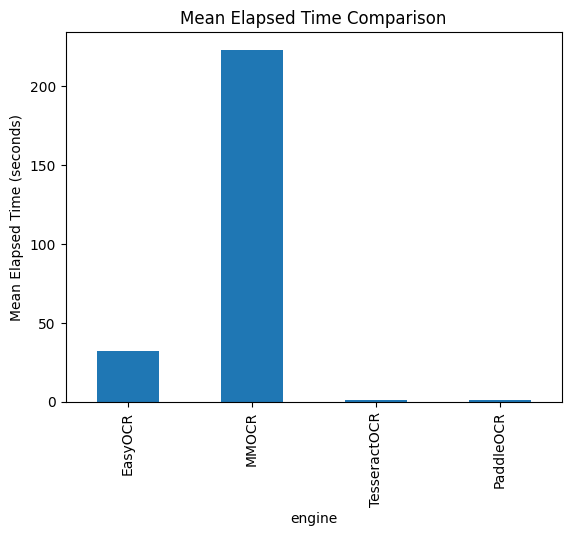

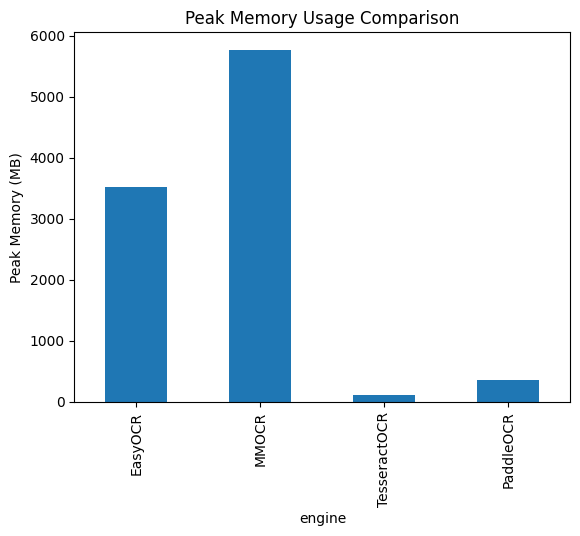

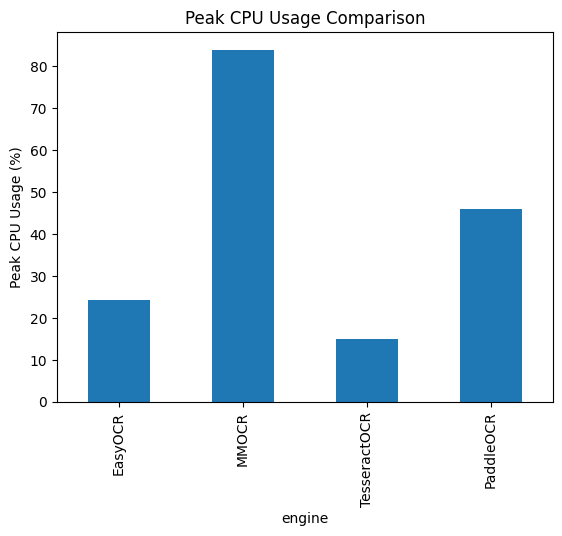

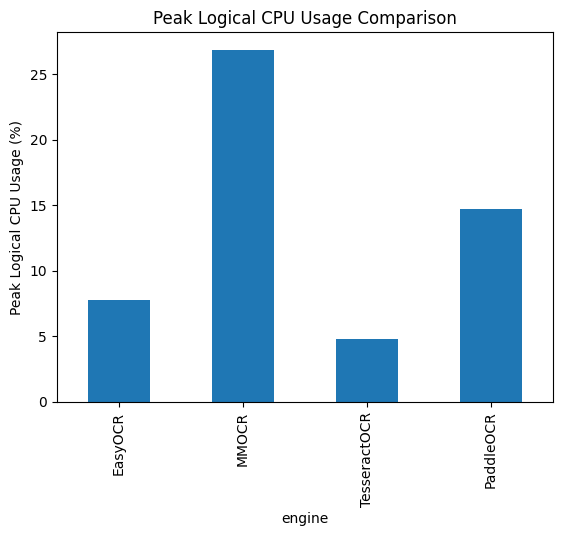

In [4]:
# Compare results
import matplotlib.pyplot as plt

# Create plots directory if it doesn't exist
plots_folder = "./plots"
os.makedirs(plots_folder, exist_ok=True)

# Plot elapsed time comparison
elapsed_time_plot_path = os.path.join(plots_folder, "elapsed_time_comparison.png")
df.plot(x="engine", y="elapsed_time", kind="bar", title="Elapsed Time Comparison", legend=False)
plt.ylabel("Elapsed Time (seconds)")
plt.savefig(elapsed_time_plot_path)
plt.show()

# Plot mean elapsed time comparison
mean_elapsed_time_plot_path = os.path.join(plots_folder, "mean_elapsed_time_comparison.png")
df.plot(x="engine", y="mean_elapsed_time", kind="bar", title="Mean Elapsed Time Comparison", legend=False)
plt.ylabel("Mean Elapsed Time (seconds)")
plt.savefig(mean_elapsed_time_plot_path)
plt.show()

# Plot peak memory usage comparison
peak_memory_plot_path = os.path.join(plots_folder, "peak_memory_usage_comparison.png")
df.plot(x="engine", y="peak_memory", kind="bar", title="Peak Memory Usage Comparison", legend=False)
plt.ylabel("Peak Memory (MB)")
plt.savefig(peak_memory_plot_path)
plt.show()

# Plot CPU usage comparison
peak_cpu_plot_path = os.path.join(plots_folder, "peak_cpu_usage_comparison.png")
df.plot(x="engine", y="peak_cpu", kind="bar", title="Peak CPU Usage Comparison", legend=False)
plt.ylabel("Peak CPU Usage (%)")
plt.savefig(peak_cpu_plot_path)
plt.show()

# Plot Logical CPU usage comparison
peak_logical_cpu_plot_path = os.path.join(plots_folder, "peak_logical_cpu_usage_comparison.png")
df.plot(x="engine", y="peak_logical_cpu", kind="bar", title="Peak Logical CPU Usage Comparison", legend=False)
plt.ylabel("Peak Logical CPU Usage (%)")
plt.savefig(peak_logical_cpu_plot_path)
plt.show()
